<a href="https://colab.research.google.com/github/georgiastuart/python_data_science_for_teachers/blob/main/Python_for_Data_Science_Lesson_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WeTeach_Python: Introduction to Python Data Visualization

## Import Statements for covered packages

We will cover:
- `matplotlib`
- `seaborn`

Typically, we import the `pyplot` module of `matplotlib` as `plt`

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from mpl_toolkits import mplot3d

# Part 1: matplotlib

- [matplotlib](https://matplotlib.org/stable/index.html) is the main python data visualization package. 
- matplotlib can do both 2D and 3D plots plus interactive visualizations
- we interact with matplotlib using `pyplot` most of the time

# `plot` and `scatter`

- `plot` and `scatter` are the two most basic matplotlib functions
- `plot` (by default) connects points into a line plot
- `scatter` (by default) represents each point as a discrete marker

We set up the figure using `plt.subplots(num_rows, num_columns)`.

Lets plot the quadratic function!

In [ ]:
# Define the quadratic function
def quadratic_function(x, a=1, b=0, c=0):
  return a * x**2 + b * x + c

In [ ]:
# Create the x and y values

x_vals = np.linspace(-10, 10, 100)
y_vals = quadratic_function(x_vals)

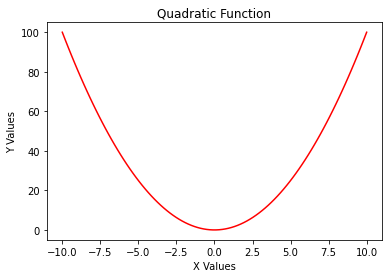

In [ ]:
# Plot!

fig, ax = plt.subplots(1, 1)
ax.plot(x_vals, y_vals, color='red')
ax.set_xlabel('X Values')
ax.set_ylabel('Y Values')
ax.set_title('Quadratic Function');

We can also plot multiple plots in the same figure:

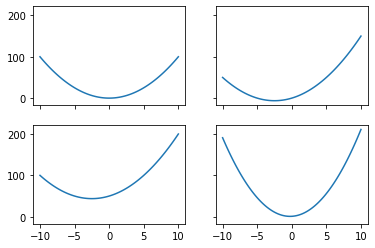

In [ ]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)

ax[0][0].plot(x_vals, quadratic_function(x_vals))
ax[0][1].plot(x_vals, quadratic_function(x_vals, b=5))
ax[1][0].plot(x_vals, quadratic_function(x_vals, b=5, c=50))
ax[1][1].plot(x_vals, quadratic_function(x_vals, a=2, b=1, c=1));

Or we can plot them all on the same axis:

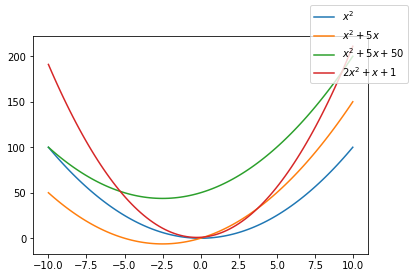

In [ ]:
fig, ax = plt.subplots(1, 1)

ax.plot(x_vals, quadratic_function(x_vals), label='$x^2$')
ax.plot(x_vals, quadratic_function(x_vals, b=5), label='$x^2 + 5x$')
ax.plot(x_vals, quadratic_function(x_vals, b=5, c=50), label='$x^2 + 5x + 50$')
ax.plot(x_vals, quadratic_function(x_vals, a=2, b=1, c=1), label='$2x^2 + x + 1$')

fig.legend();

**Your Turn!**

Create a function describing a mathematical function with an argument for the x values and keyword arguments for any parameters. Then, plot at least 4 plots.

### Plotting from loaded data

We can also plot from a loaded numpy array:

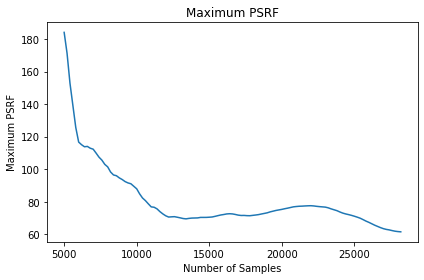

In [ ]:
# Set up axes
fig, ax = plt.subplots(1, 1)

# Load the data for the plot demo
mpsrf_data = np.load('mpsrf.npy')

# Plot plot demo
ax.plot(mpsrf_data[0, :], mpsrf_data[1, :])
ax.set_ylabel('Maximum PSRF')
ax.set_xlabel('Number of Samples')
ax.set_title('Maximum PSRF')

# Adjust layout for labels
fig.tight_layout()

### Scatter Plots

In addition to `plot`, which creates a connected line, we can also use `scatter`.

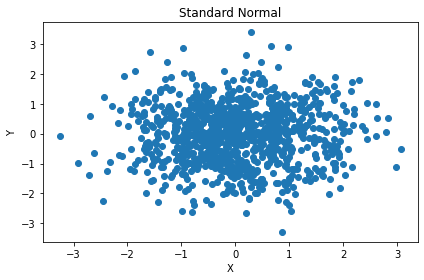

In [ ]:
# Set up axes
fig, ax = plt.subplots(1, 1)

# Make up data for scatterplot demo
xdata = np.random.randn(1000)
ydata = np.random.randn(1000)

# Plot scatterplot demo
ax.scatter(xdata, ydata)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Standard Normal')

# Adjust layout for labels
fig.tight_layout()

# Variations on `plot`

- Color, linestyle, marker, etc

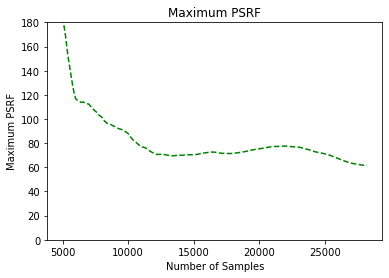

In [ ]:
# Set up axes
fig, ax = plt.subplots(1, 1)

# Plot plot demo
ax.plot(mpsrf_data[0, :], mpsrf_data[1, :], color='green', linestyle='--')
ax.set_ylabel('Maximum PSRF')
ax.set_xlabel('Number of Samples')
ax.set_title('Maximum PSRF')
ax.set_ylim([0, 180]);

# Variations on `scatter`

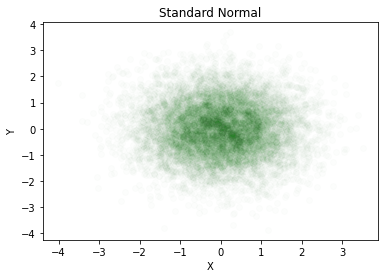

In [ ]:
# Set up axes
fig, ax = plt.subplots(1, 1)

# Make up data for scatterplot demo
xdata = np.random.randn(10000)
ydata = np.random.randn(10000)

# Plot scatterplot demo
ax.scatter(xdata, ydata, color='green', alpha=0.01)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Standard Normal');

**Your turn!**

Import the Pandas data we used yesterday and create scatter plots exploring the relationship between some numerical variables. 

In [ ]:
cas_data = pd.read_csv('https://raw.githubusercontent.com/georgiastuart/WeTeach_Python/main/cas_data.csv', header=0, encoding = "ISO-8859-1", engine='python')
cas_data


In [ ]:
# Your plots here

# An aside: plotting densities with Seaborn

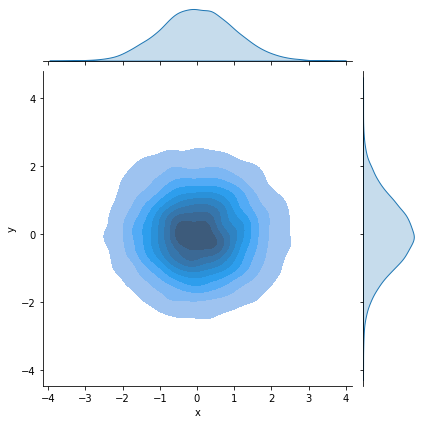

In [ ]:
# Create a pandas dataframe from the data
df = pd.DataFrame({'x': xdata, 'y': ydata})

# Plot joint plot
sns.jointplot(data=df, x="x", y="y", kind="kde", fill=True);

# Plotting Histograms with Matplotlib

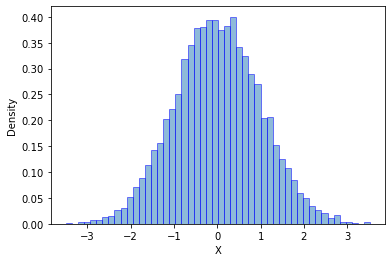

In [ ]:
# Setup axis
fig, ax = plt.subplots(1, 1)

# Histogram of x data from above
ax.hist(df['x'], bins=50, alpha=0.50, edgecolor='blue', density=True)
ax.set_xlabel('X')
ax.set_ylabel('Density');

# Plotting Kernel Density Estimates with Seaborn

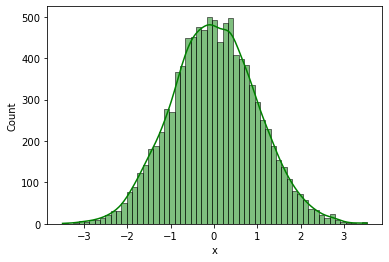

In [ ]:
sns.histplot(df, x='x', kde=True, color='green');

**Your turn!**

Create histograms from some of the data in the `cas_data` data frame.

In [ ]:
# Your plots here

# Viewing 2D Image Data: pcolormesh and imshow

- imshow displays images defined by numerical values on a regular grid
- pcolormesh can handle irregular grids

(75, 75)


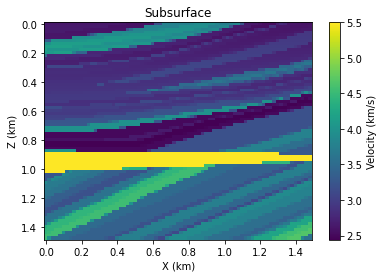

In [ ]:
# load data
ref = np.load('reference.npy')
print(ref.shape)

# set up axis
fig, ax = plt.subplots(1, 1)

# Plot
# pc = ax.pcolormesh(ref, shading='auto')
pc = ax.pcolormesh(np.arange(0, ref.shape[1] * 0.02, 0.02), np.arange(0, ref.shape[0] * 0.02, 0.02), ref, shading='auto')
fig.colorbar(pc, label='Velocity (km/s)')
ax.invert_yaxis()
ax.set_xlabel('X (km)')
ax.set_ylabel('Z (km)')
ax.set_title('Subsurface');

### Plotting functions of two variables

In [ ]:
def rosenbrock_function(x, y, a=1, b=100):
  return (a - x)**2 + b * (y - x**2)**2

In [ ]:
r_x_vals = np.linspace(-2, 1, 100)
r_y_vals = np.linspace(-3, 3, 100)

X, Y = np.meshgrid(r_x_vals, r_y_vals)

(100, 100)


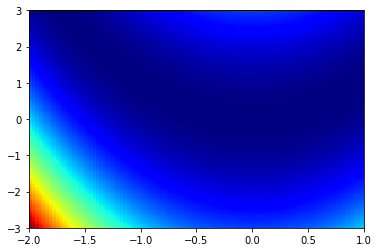

In [ ]:
fig, ax = plt.subplots(1, 1)
print(rosenbrock_function(X, Y).shape)
ax.pcolormesh(r_x_vals, r_y_vals, rosenbrock_function(X, Y), cmap='jet')

### 3D Plots

We can also plot a 3D picture

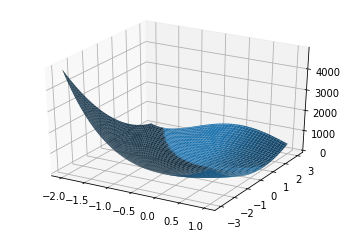

In [ ]:
fig, ax = plt.subplots(1, 1)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, rosenbrock_function(X, Y));

**Your turn!**

Create a function with two arguments and plot it in 2D and 3D. 

# Making Animations

In [ ]:
velocity = np.load('velocity.npy')
lat = np.load('lat.npy')
lon = np.load('lon.npy')

vmin = np.nanmin(velocity[0, :, :, :])
vmax = np.nanmax(velocity[0, :, :, :])

In [ ]:
fig, ax = plt.subplots()
pc = ax.pcolormesh(lon, lat, velocity[0, :, :, 0], vmin=vmin, vmax=vmax, shading='auto')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Water Velocity')
ax.scatter(-88.365997, 28.736628, marker='x', color='red')
def animate(i):
    pc.set_array(velocity[0, :, :, i].flatten())
    return pc
fig.colorbar(pc, label="Eastward velocity (m/s)")
anim = FuncAnimation(fig, animate, frames=range(velocity.shape[3]), interval=200)
plt.close()
HTML(anim.to_jshtml())

# Overall Recommendations

- The docs are your friend! Take a look at the [matplotlib gallery](https://matplotlib.org/stable/gallery/index.html) and the [seaborn gallery](https://seaborn.pydata.org/examples/index.html) for ideas.
- Google is your friend! Especially google searches that lead to stackoverflow posts (applies to all programming).
- Jupyter notebooks are great for data viz, but not necessary
    - get your images out of jupyter with fig.savefig('filename.png')
- *Always label your figures*

# My Figure Workflow (for publications)

1. Make figures in matplotlib / seaborn
2. Export to PDF (not png)
3. Clean up figures in Adobe Illustrator / Inkscape (free) as needed 